In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing


In [ ]:
#loading dataset
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and coloumns
gold_data.shape

(2290, 6)

In [ ]:
#basic info of data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#statistical values of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = gold_data.corr()

<ipython-input-12-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

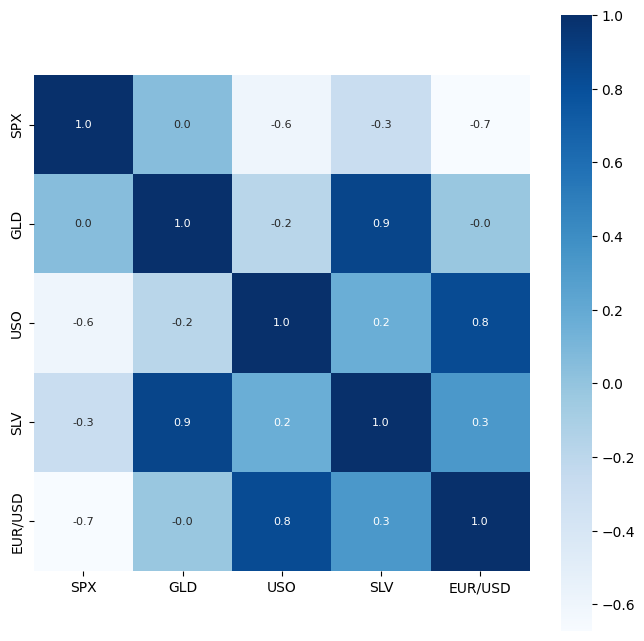

In [ ]:
#constructing heat map to understand the correlation
plt.figure( figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws={'size' : 8}, cmap='Blues')

In [ ]:
#correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-14-1aa14d443eb1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

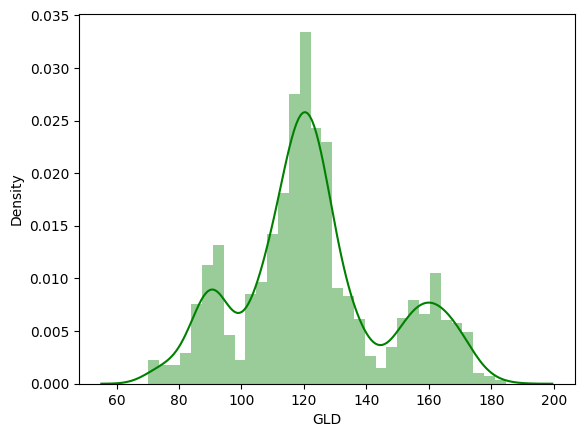

In [ ]:
#checking the distribution of GLD
sns.distplot(gold_data['GLD'], color='green')

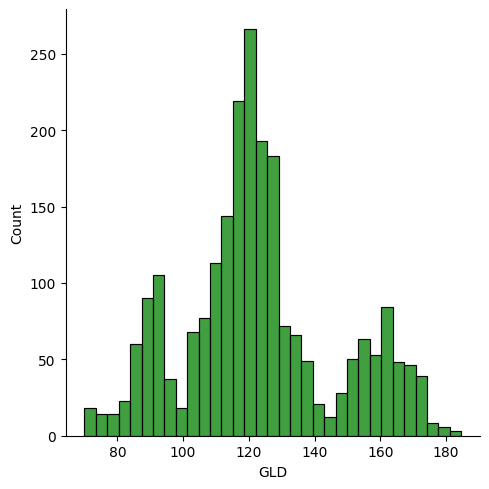

In [ ]:
sns.displot(gold_data['GLD'], color='green')

splitting the features and target


In [ ]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting data into training and testing


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model training Random Forest Regressor


In [ ]:
regressor = RandomForestRegressor(n_estimators= 100)

In [ ]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
#prediction on test data
test_data_pred = regressor.predict(X_test)

In [ ]:
 print(test_data_pred)

[168.57539934  82.17129975 115.83160015 127.62430052 120.88820125
 154.66259733 150.22109755 126.05250002 117.59029869 125.99020102
 116.55630133 171.58140076 141.05679876 167.7942988  115.25989994
 117.56450007 138.50800321 170.16280083 159.67550331 158.31019922
 155.11409996 125.47240032 175.7869987  156.86670353 125.17910045
  93.88310001  76.96470013 120.86499993 119.07759926 167.38649959
  88.1006004  125.19730001  91.23100074 117.67710035 121.16679906
 136.30980074 115.39230118 115.28370077 146.52400055 107.12120076
 104.2640026   87.20429799 126.47000025 117.87579958 153.41389943
 119.55839999 108.27010013 108.12839821  93.22600035 127.16009758
  74.85180058 113.6269991  121.0571997  111.14669885 118.91539896
 120.74719944 160.35140036 168.29270064 147.20189711  85.63099856
  94.43560037  86.88959888  90.6545999  118.97930097 126.5360003
 127.45120032 168.08999965 122.22229943 117.41579883  98.40110026
 167.88900048 143.21339835 131.93650221 121.13430212 121.37269957
 119.672700

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_pred)
print('R squared error value: ', error_score)

R squared error value:  0.9897111036793125


**Comparer the actual and predicted values**

In [ ]:
Y_test = list(Y_test)

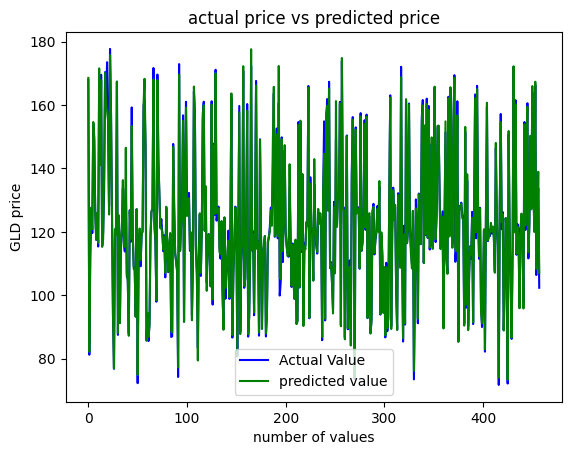

In [ ]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_pred, color='green', label='predicted value' )
plt.title('actual price vs predicted price')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()
